In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X              = 10                # number of photons flowing into the detector system (positive integer)
P_D            = 1e-6              # dark count probability (real number between 0 and 1)
ETA            = 0.1               # detector efficiency (real number between 0 and 1)
MU             = 0.02              # mean number of photons detected on some time interval (positive real number)
P_AB           = 0                 # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B      = 0.5               # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR      = 0.5               # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR  = 0                 # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A            = P_AB + P_A_B_BAR  # probability of detecting one basis A (real number between 0 and 1)
P_B            = P_AB + P_A_BAR_B  # probability of detecting one basis B (real number between 0 and 1)
PROBABILITIES  = [P_AB, P_A_BAR_B, P_A_B_BAR, P_A_BAR_B_BAR]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_1_actual1(p_d, eta, mu):
    case1_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_1 = (1 - p_d)**2 * (1 - eta)**(2 * sum(photons) - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_1 * multinomial(photons, PROBABILITIES)
        case1_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case1_actual

def case_1_actual2(p_d, eta, mu):
    return (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + (1 - p_d) * mu * P_A * eta * (1 - eta)) * (p_d + (1 - p_d) * mu * P_B * eta * (1 - eta)) + (1 - p_d)**2 * mu * P_AB * eta**2)

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_actual(p_d, eta, mu):
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, PROBABILITIES)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case2_actual

def case_2_approx(p_d, eta, mu):
    return (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * P_A * eta) * (p_d + mu * P_B * eta) + mu * P_AB * eta**2)

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_actual(p_d, eta, mu):
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, PROBABILITIES)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case3_actual

def case_3_approx(p_d, eta, mu):
    return (p_d + (1 - 2 * p_d) * mu * P_A * eta) * (p_d + (1 - 2 * p_d) * mu * P_B * eta) + (1 - 2 * p_d)**2 * mu * P_AB * eta**2

In [7]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_actual(p_d, eta, mu):
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, PROBABILITIES)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    return case4_actual

def case_4_approx(p_d, eta, mu):
    return (p_d + (1 - p_d) * mu * P_A * eta) * (p_d + (1 - p_d) * mu * P_B * eta) + (1 - p_d)**2 * mu * P_AB * eta**2

In [8]:
# Exact probabilities based on varying dark count probability
total_coin_prob_1_PD = []
total_coin_prob_2_PD = []
total_coin_prob_3_PD = []
total_coin_prob_4_PD = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    total_coin_prob_1_PD.append(case_1_actual2(p_d, ETA, MU))
    total_coin_prob_2_PD.append(case_2_actual(p_d, ETA, MU))
    total_coin_prob_3_PD.append(case_3_actual(p_d, ETA, MU))
    total_coin_prob_4_PD.append(case_4_actual(p_d, ETA, MU))
print(total_coin_prob_1_PD)
print(total_coin_prob_2_PD)
print(total_coin_prob_3_PD)
print(total_coin_prob_4_PD)

[3.5857195987662184e-06, 8.334268116741416e-06, 1.5040686964876326e-05, 2.369311357927864e-05, 3.4279709262012316e-05, 4.678865918109761e-05, 6.120817237051103e-05, 7.752648173018537e-05, 9.573184402600976e-05, 0.00011581253988982944, 0.00013775687381944606, 0.0001615531741786176, 0.00018718979319705812, 0.00021465510697043816, 0.00024393751546038423, 0.0002750254424944798, 0.0003079073357662636, 0.0003425716668352316, 0.0003790069311268353, 0.00041720164793248297, 0.000457144360409539, 0.000498823635581324, 0.0005422280643371147, 0.0005873462614321449, 0.0006341668654876034, 0.0006826785389906365, 0.0007328699682943456, 0.0007847298636177892, 0.0008382469590459825, 0.0008934100125298957, 0.0009502078058864561, 0.0010086291447985473, 0.0010686628588150084, 0.0011302978013506364, 0.0011935228496861828, 0.001258326904968356, 0.0013246988922098208, 0.0013926277602891984, 0.0014621024819510664, 0.001533112053805958, 0.001605645496330364, 0.0016796918538667291, 0.001755240194623457, 0.00183

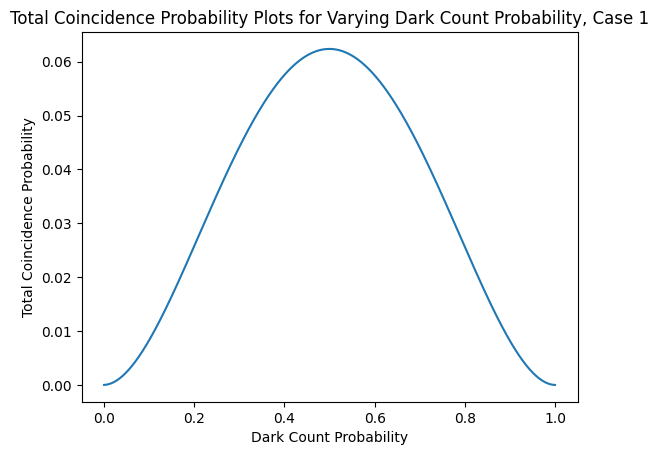

In [9]:
plt.plot(range_PD, total_coin_prob_1_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 1')
plt.savefig("total_coin_prob_1_PD_2.png")
plt.show()

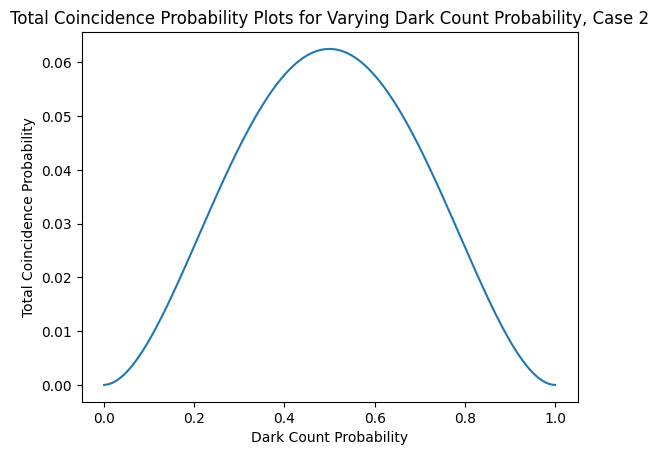

In [10]:
plt.plot(range_PD, total_coin_prob_2_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 2')
plt.savefig("total_coin_prob_2_PD_2.png")
plt.show()

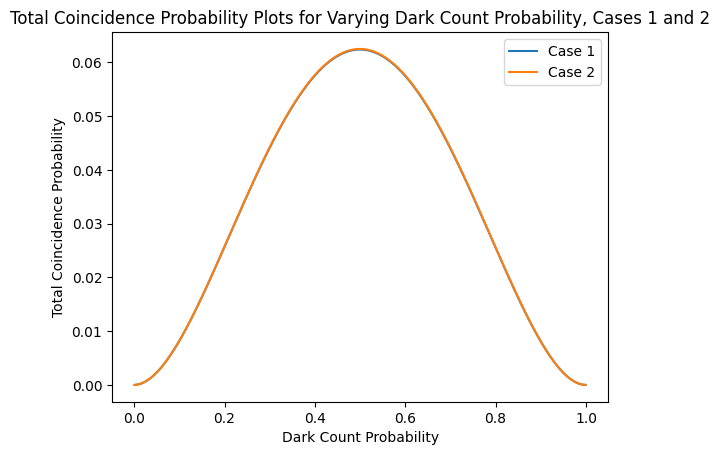

In [11]:
plt.plot(range_PD, total_coin_prob_1_PD, label = 'Case 1')
plt.plot(range_PD, total_coin_prob_2_PD, label = 'Case 2')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Cases 1 and 2')
plt.legend()
plt.savefig("total_coin_prob_12_PD_2.png")
plt.show()

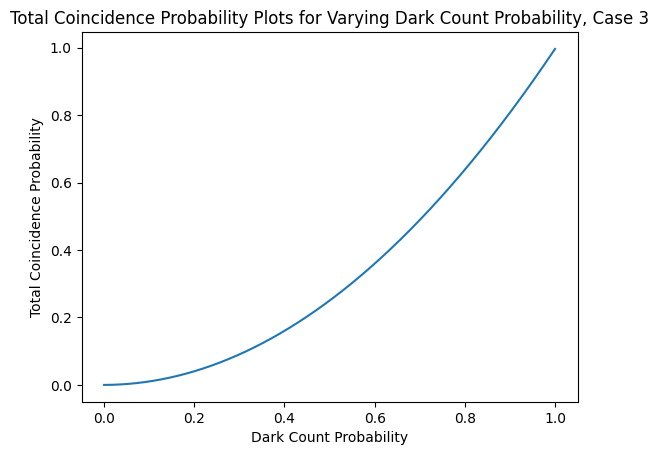

In [12]:
plt.plot(range_PD, total_coin_prob_3_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 3')
plt.savefig("total_coin_prob_3_PD_2.png")
plt.show()

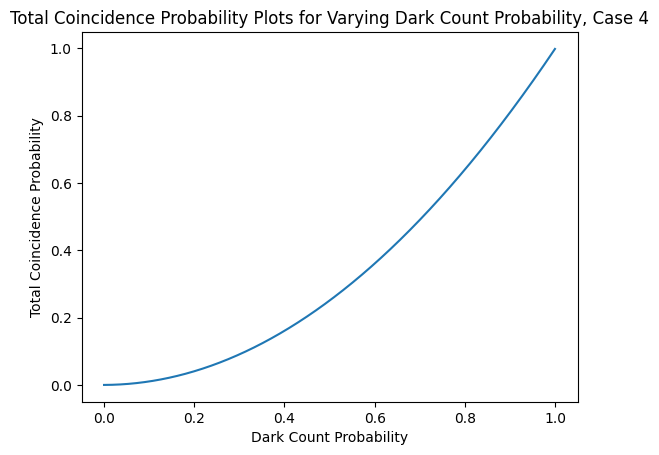

In [13]:
plt.plot(range_PD, total_coin_prob_4_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 4')
plt.savefig("total_coin_prob_4_PD_2.png")
plt.show()

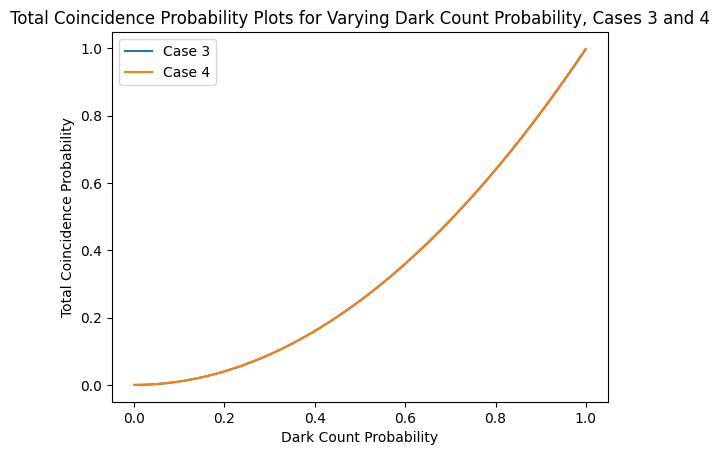

In [14]:
plt.plot(range_PD, total_coin_prob_3_PD, label = 'Case 3')
plt.plot(range_PD, total_coin_prob_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Cases 3 and 4')
plt.legend()
plt.savefig("total_coin_prob_34_PD_2.png")
plt.show()

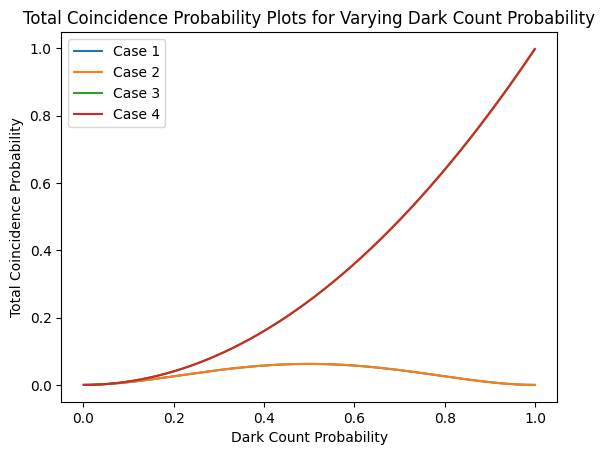

In [15]:
# Plot exact probabilities based on varying dark count probability
plt.plot(range_PD, total_coin_prob_1_PD, label = 'Case 1')
plt.plot(range_PD, total_coin_prob_2_PD, label = 'Case 2')
plt.plot(range_PD, total_coin_prob_3_PD, label = 'Case 3')
plt.plot(range_PD, total_coin_prob_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("total_coin_prob_PD_2.png")
plt.show()
# plt.close()

In [16]:
# Exact probabilities based on varying detector efficiency
total_coin_prob_1_eta = []
total_coin_prob_2_eta = []
total_coin_prob_3_eta = []
total_coin_prob_4_eta = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    total_coin_prob_1_eta.append(case_1_actual2(P_D, eta, MU))
    total_coin_prob_2_eta.append(case_2_actual(P_D, eta, MU))
    total_coin_prob_3_eta.append(case_3_actual(P_D, eta, MU))
    total_coin_prob_4_eta.append(case_4_actual(P_D, eta, MU))
print(total_coin_prob_1_eta)
print(total_coin_prob_2_eta)
print(total_coin_prob_3_eta)
print(total_coin_prob_4_eta)

[1.2077481018682395e-10, 4.39284775593907e-10, 9.553098680268753e-10, 1.6676327012160998e-09, 2.575038527831851e-09, 3.6763152385010725e-09, 4.970253360825794e-09, 6.455646058403157e-09, 8.13128912984709e-09, 9.995981007811566e-09, 1.2048522758015526e-08, 1.4287718078269442e-08, 1.6712373297503423e-08, 1.9321297374797015e-08, 2.2113301898410615e-08, 2.5087201084818527e-08, 2.8241811777743497e-08, 3.157595344719312e-08, 3.508844818849762e-08, 3.877812072134939e-08, 4.264379838884414e-08, 4.6684311156523655e-08, 5.089849161142003e-08, 5.52851749611018e-08, 5.984319903272149e-08, 6.457140427206473e-08, 6.946863374260123e-08, 7.453373312453701e-08, 7.976555071386875e-08, 8.516293742143922e-08, 9.072474677199453e-08, 9.644983490324326e-08, 1.0233706056491677e-07, 1.0838528511783127e-07, 1.1459337253295175e-07, 1.2096018939045709e-07, 1.2748460487880714e-07, 1.341654907938112e-07, 1.410017215376984e-07, 1.479921741181889e-07, 1.5513572814756795e-07, 1.6243126584176045e-07, 1.698776720194076e

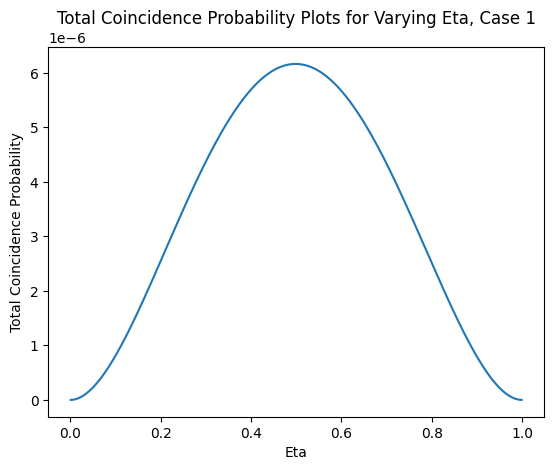

In [17]:
plt.plot(range_eta, total_coin_prob_1_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 1')
plt.savefig("total_coin_prob_1_eta_2.png")
plt.show()

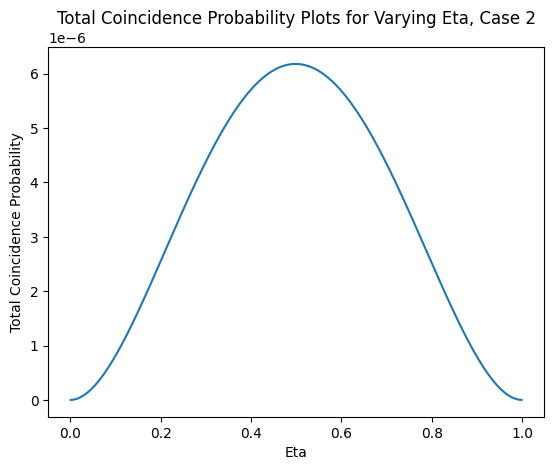

In [18]:
plt.plot(range_eta, total_coin_prob_2_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 2')
plt.savefig("total_coin_prob_2_eta_2.png")
plt.show()

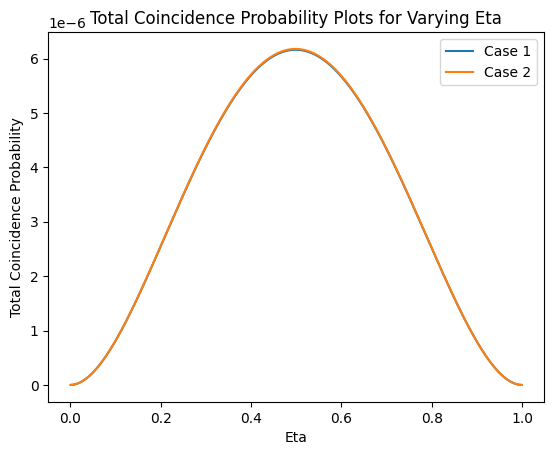

In [19]:
plt.plot(range_eta, total_coin_prob_1_eta, label = 'Case 1')
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 2')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta')
plt.legend()
plt.savefig("total_coin_prob_12_eta_2.png")
plt.show()

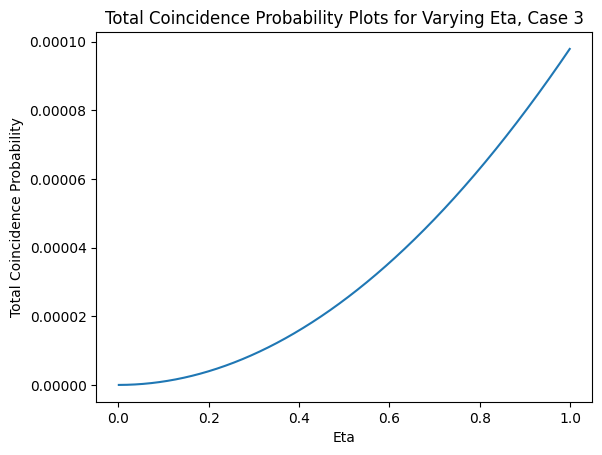

In [20]:
plt.plot(range_eta, total_coin_prob_3_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 3')
plt.savefig("total_coin_prob_3_eta_2.png")
plt.show()

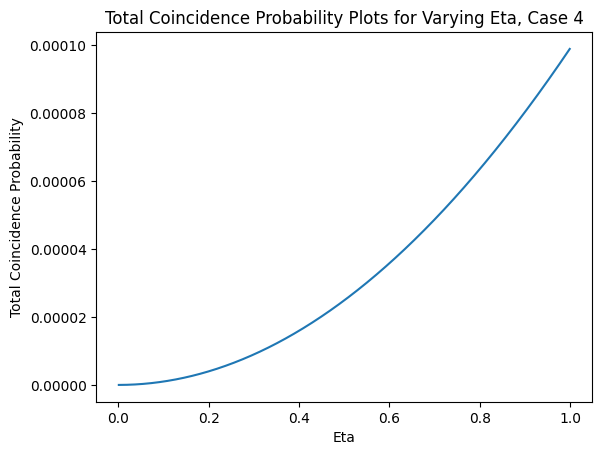

In [21]:
plt.plot(range_eta, total_coin_prob_4_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 4')
plt.savefig("total_coin_prob_4_eta_2.png")
plt.show()

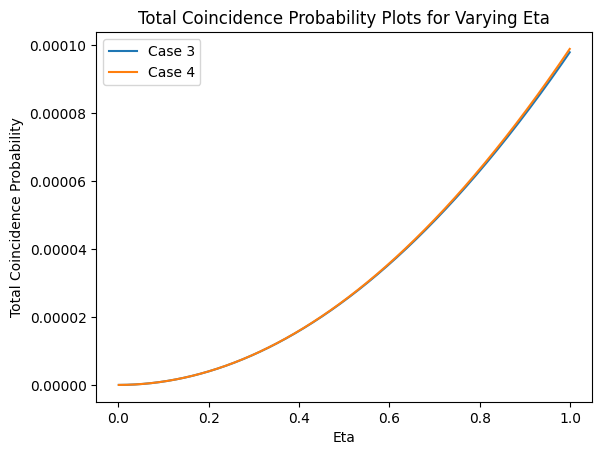

In [22]:
plt.plot(range_eta, total_coin_prob_3_eta, label = 'Case 3')
plt.plot(range_eta, total_coin_prob_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta')
plt.legend()
plt.savefig("total_coin_prob_34_eta_2.png")
plt.show()

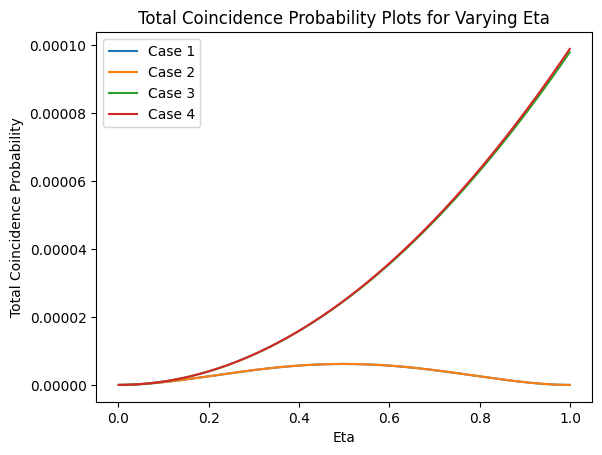

In [23]:
# Plot exact probabilities based on varying detector efficiency
plt.plot(range_eta, total_coin_prob_1_eta, label = 'Case 1')
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 2')
plt.plot(range_eta, total_coin_prob_3_eta, label = 'Case 3')
plt.plot(range_eta, total_coin_prob_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta')
plt.legend()
plt.savefig("total_coin_prob_eta_2.png")
plt.show()
# plt.close()

In [24]:
# Exact probabilities based on varying mean number of photons detected on some time interval
total_coin_prob_1_mu = []
total_coin_prob_2_mu = []
total_coin_prob_3_mu = []
total_coin_prob_4_mu = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    total_coin_prob_1_mu.append(case_1_actual2(P_D, ETA, mu))
    total_coin_prob_2_mu.append(case_2_actual(P_D, ETA, mu))
    total_coin_prob_3_mu.append(case_3_actual(P_D, ETA, mu))
    total_coin_prob_4_mu.append(case_4_actual(P_D, ETA, mu))
print(total_coin_prob_1_mu)
print(total_coin_prob_2_mu)
print(total_coin_prob_3_mu)
print(total_coin_prob_4_mu)

[2.1155896277943286e-09, 8.277820888377178e-09, 1.8485386614218362e-08, 3.2735980516456287e-08, 5.1027297182620445e-08, 7.33570320763538e-08, 9.972288153713533e-08, 1.3012254278000288e-07, 1.6455371389527579e-07, 2.0301409384827752e-07, 2.4550138247905844e-07, 2.920132805021198e-07, 3.4254748950613517e-07, 3.9710171195367497e-07, 4.5567365118092863e-07, 5.182610113974288e-07, 5.848614976857739e-07, 6.554728160013524e-07, 7.30092673172065e-07, 8.087187768980494e-07, 8.913488357514044e-07, 9.779805591759113e-07, 1.068611657486761e-06, 1.1632398418702757e-06, 1.2618628243836322e-06, 1.364478317954589e-06, 1.4710840363812077e-06, 1.5816776943315776e-06, 1.6962570073435421e-06, 1.8148196918244207e-06, 1.9373634650507324e-06, 2.0638860451679255e-06, 2.194385151190098e-06, 2.3288585029997207e-06, 2.4673038213473676e-06, 2.6097188278514367e-06, 2.7561012449978735e-06, 2.9064487961398987e-06, 3.0607592054977374e-06, 3.219030198158336e-06, 3.38125950007509e-06, 3.5474448380675766e-06, 3.71758393

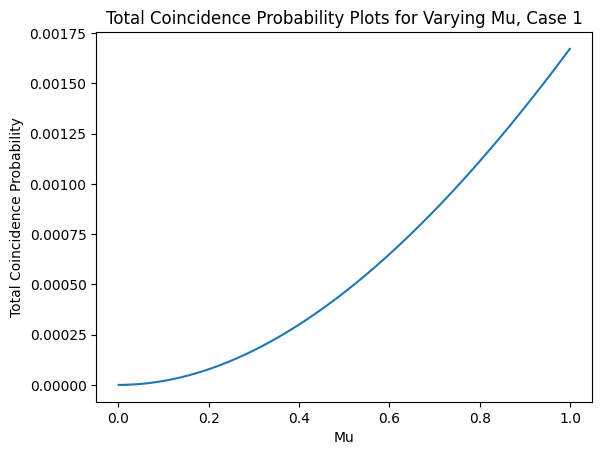

In [25]:
plt.plot(range_mu, total_coin_prob_1_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 1')
plt.savefig("total_coin_prob_1_mu_2.png")
plt.show()

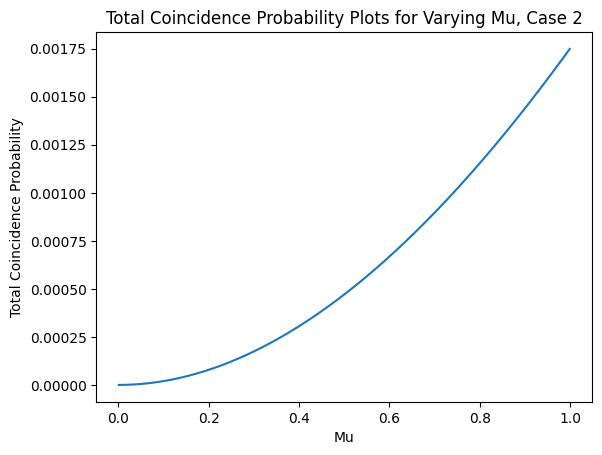

In [26]:
plt.plot(range_mu, total_coin_prob_2_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 2')
plt.savefig("total_coin_prob_2_mu_2.png")
plt.show()

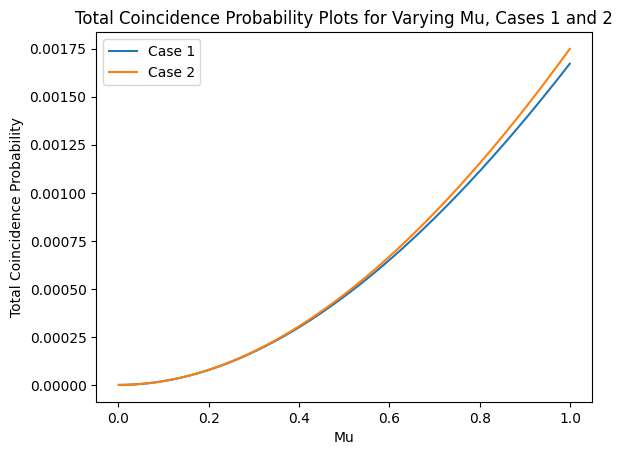

In [27]:
plt.plot(range_mu, total_coin_prob_1_mu, label = 'Case 1')
plt.plot(range_mu, total_coin_prob_2_mu, label = 'Case 2')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Cases 1 and 2')
plt.legend()
plt.savefig("total_coin_prob_12_mu_2.png")
plt.show()

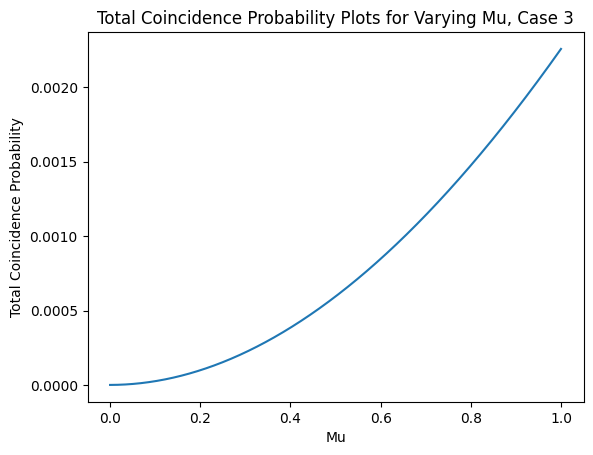

In [28]:
plt.plot(range_mu, total_coin_prob_3_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 3')
plt.savefig("total_coin_prob_3_mu_2.png")
plt.show()

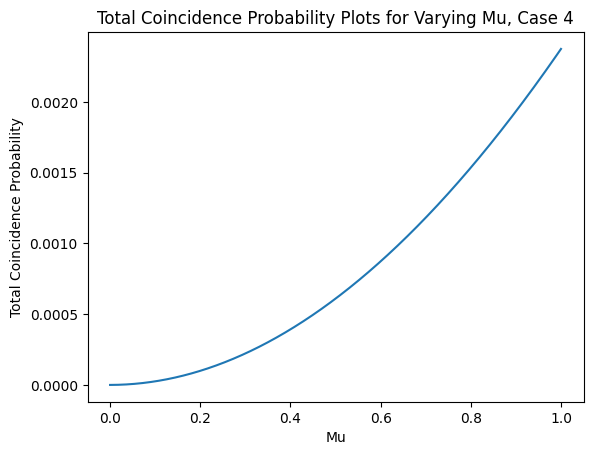

In [29]:
plt.plot(range_mu, total_coin_prob_4_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 4')
plt.savefig("total_coin_prob_4_mu_2.png")
plt.show()

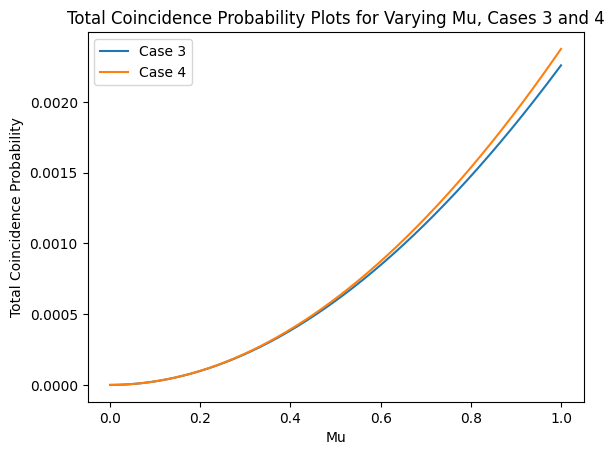

In [30]:
plt.plot(range_mu, total_coin_prob_3_mu, label = 'Case 3')
plt.plot(range_mu, total_coin_prob_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Cases 3 and 4')
plt.legend()
plt.savefig("total_coin_prob_34_mu_2.png")
plt.show()

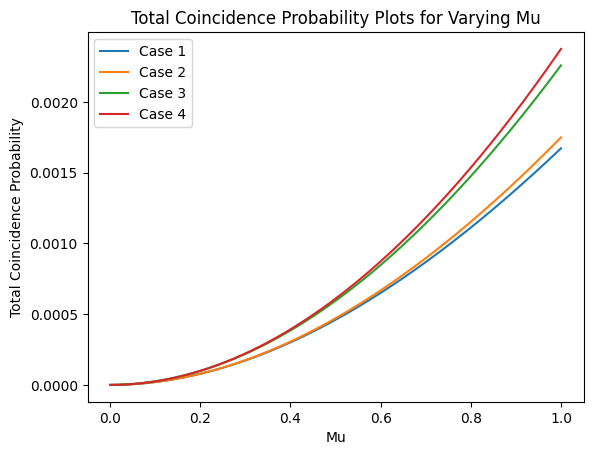

In [31]:
# Plot exact probabilities based on varying detector efficiency
plt.plot(range_mu, total_coin_prob_1_mu, label = 'Case 1')
plt.plot(range_mu, total_coin_prob_2_mu, label = 'Case 2')
plt.plot(range_mu, total_coin_prob_3_mu, label = 'Case 3')
plt.plot(range_mu, total_coin_prob_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu')
plt.legend()
plt.savefig("total_coin_prob_mu_2.png")
plt.show()
# plt.close()

In [32]:
total_coin_prob_2_PD_approx = []
total_coin_prob_3_PD_approx = []
total_coin_prob_4_PD_approx = []
for p_d in range_PD:
    total_coin_prob_2_PD_approx.append(case_2_approx(p_d, ETA, MU))
    total_coin_prob_3_PD_approx.append(case_3_approx(p_d, ETA, MU))
    total_coin_prob_4_PD_approx.append(case_4_approx(p_d, ETA, MU))
print(total_coin_prob_2_PD_approx)
print(total_coin_prob_3_PD_approx)
print(total_coin_prob_4_PD_approx)

[3.9768631705953295e-06, 8.930037301638645e-06, 1.5843822935409054e-05, 2.470633731229538e-05, 3.550572158165951e-05, 4.823014080183638e-05, 6.286778394013399e-05, 7.940686387283343e-05, 9.783561738518882e-05, 0.00011814230517142733, 0.00014031521183474914, 0.00016434264588732772, 0.0001902129397503093, 0.0002179144497538134, 0.00024743555613693236, 0.00027876466304773193, 0.00031189019854325063, 0.0003468006145895001, 0.0003834843870614652, 0.00042193001574310343, 0.000462126024327346, 0.0005040609604160967, 0.0005477233955202322, 0.0005931019250596031, 0.0006401851683630321, 0.0006889617686683154, 0.0007394203931222225, 0.000791549732780495, 0.0008453385026078492, 0.0009007754414779728, 0.0009578493121735271, 0.0010165489013861477, 0.0010768630197164409, 0.0011387805016739884, 0.0012022902056773432, 0.0012673810140540322, 0.0013340418330405554, 0.0014022615927823852, 0.0014720292473339681, 0.0015433337746587235, 0.0016161641766290424, 0.0016905094790262908, 0.0017663587315408062, 0.0

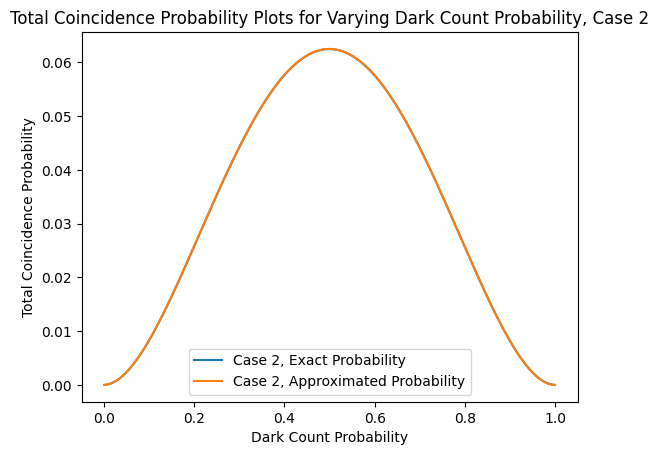

In [33]:
plt.plot(range_PD, total_coin_prob_2_PD, label = 'Case 2, Exact Probability')
plt.plot(range_PD, total_coin_prob_2_PD_approx, label = 'Case 2, Approximated Probability')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 2')
plt.legend()
plt.savefig("total_coin_prob_2_PD_comp_2.png")
plt.show()

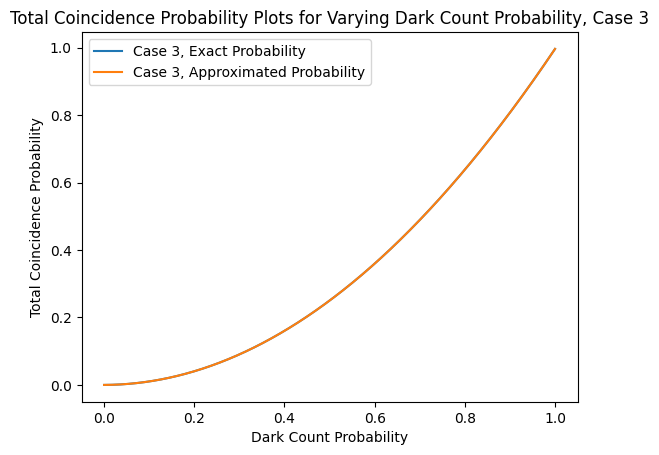

In [34]:
plt.plot(range_PD, total_coin_prob_3_PD, label = 'Case 3, Exact Probability')
plt.plot(range_PD, total_coin_prob_3_PD_approx, label = 'Case 3, Approximated Probability')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 3')
plt.legend()
plt.savefig("total_coin_prob_3_PD_comp_2.png")
plt.show()

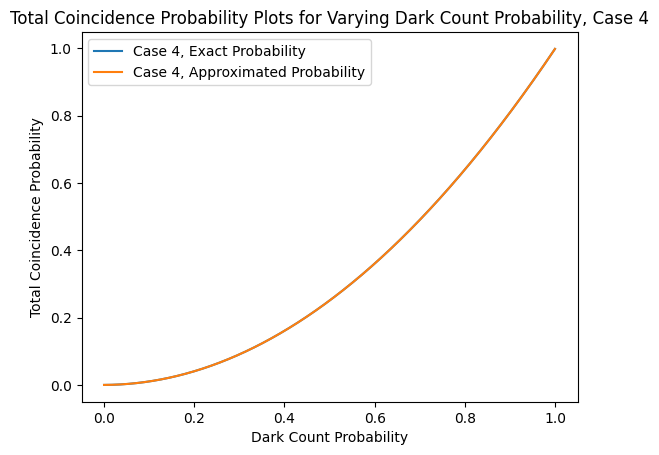

In [35]:
plt.plot(range_PD, total_coin_prob_4_PD, label = 'Case 4, Exact Probability')
plt.plot(range_PD, total_coin_prob_4_PD_approx, label = 'Case 4, Approximated Probability')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 4')
plt.legend()
plt.savefig("total_coin_prob_4_PD_comp_2.png")
plt.show()

In [36]:
total_coin_prob_2_eta_approx = []
total_coin_prob_3_eta_approx = []
total_coin_prob_4_eta_approx = []
for eta in range_eta:
    total_coin_prob_2_eta_approx.append(case_2_approx(P_D, eta, MU))
    total_coin_prob_3_eta_approx.append(case_3_approx(P_D, eta, MU))
    total_coin_prob_4_eta_approx.append(case_4_approx(P_D, eta, MU))
print(total_coin_prob_2_eta_approx)
print(total_coin_prob_3_eta_approx)
print(total_coin_prob_4_eta_approx)

[1.209949205264979e-10, 4.409638747592691e-10, 9.608829381094237e-10, 1.6807282378881602e-09, 2.600475951297079e-09, 3.720102305418508e-09, 5.0395835772058475e-09, 6.558896093473925e-09, 8.278016230889369e-09, 1.0196920415961005e-08, 1.231558512503024e-08, 1.4633986884261525e-08, 1.715210226963274e-08, 1.986990790692567e-08, 2.278738047171646e-08, 2.5904496689366162e-08, 2.92212333350111e-08, 3.2737567233553516e-08, 3.6453475259652026e-08, 4.0368934337712156e-08, 4.4483921441876986e-08, 4.879841359601764e-08, 5.331238787372385e-08, 5.80258213982947e-08, 6.293869134272914e-08, 6.805097492971663e-08, 7.336264943162777e-08, 7.887369217050506e-08, 8.458408051805353e-08, 9.049379189563145e-08, 9.660280377424096e-08, 1.02911093674519e-07, 1.0941863916672776e-07, 1.161254178707458e-07, 1.2303140745605848e-07, 1.3013658564174893e-07, 1.3744093019648894e-07, 1.4494441893852948e-07, 1.52647029735692e-07, 1.6054874050535884e-07, 1.686495292144643e-07, 1.769493738794854e-07, 1.8544825256643316e-07

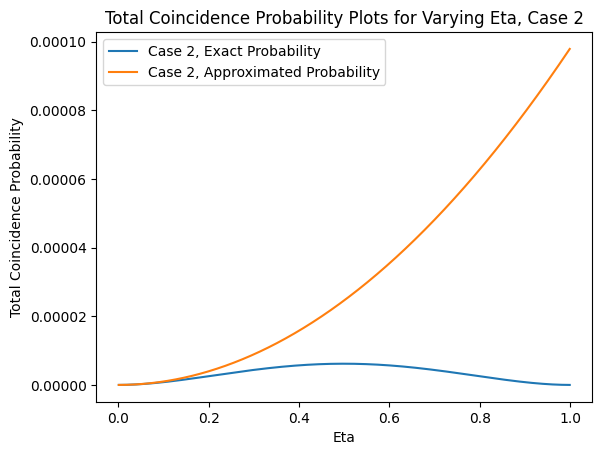

In [37]:
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 2, Exact Probability')
plt.plot(range_eta, total_coin_prob_2_eta_approx, label = 'Case 2, Approximated Probability')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 2')
plt.legend()
plt.savefig("total_coin_prob_2_eta_comp_2.png")
plt.show()

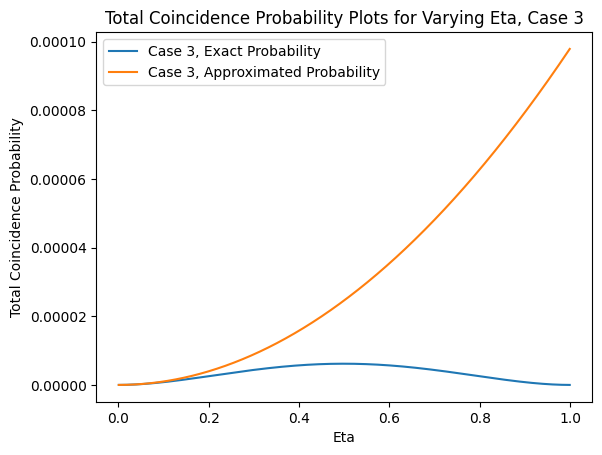

In [38]:
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 3, Exact Probability')
plt.plot(range_eta, total_coin_prob_2_eta_approx, label = 'Case 3, Approximated Probability')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 3')
plt.legend()
plt.savefig("total_coin_prob_3_eta_comp_2.png")
plt.show()

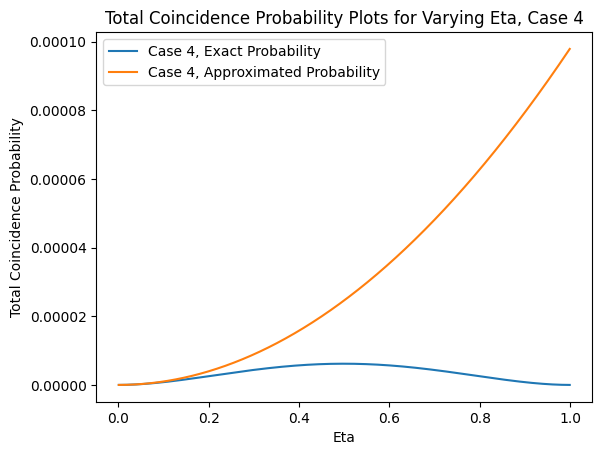

In [39]:
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 4, Exact Probability')
plt.plot(range_eta, total_coin_prob_2_eta_approx, label = 'Case 4, Approximated Probability')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 4')
plt.legend()
plt.savefig("total_coin_prob_4_eta_comp_2.png")
plt.show()

In [40]:
total_coin_prob_2_mu_approx = []
total_coin_prob_3_mu_approx = []
total_coin_prob_4_mu_approx = []
for mu in range_mu:
    total_coin_prob_2_mu_approx.append(case_2_approx(P_D, ETA, mu))
    total_coin_prob_3_mu_approx.append(case_3_approx(P_D, ETA, mu))
    total_coin_prob_4_mu_approx.append(case_4_approx(P_D, ETA, mu))
print(total_coin_prob_2_mu_approx)
print(total_coin_prob_3_mu_approx)
print(total_coin_prob_4_mu_approx)

[2.6005006559359635e-09, 1.0197103962180401e-08, 2.2787961557327307e-08, 4.037022616428008e-08, 6.294105158790882e-08, 9.049759271470772e-08, 1.2303700551245253e-07, 1.605564470298582e-07, 2.0305307539623666e-07, 2.505240498211542e-07, 3.029665305940897e-07, 3.6037767908409295e-07, 4.227546577394418e-07, 4.900946300873011e-07, 5.623947607333806e-07, 6.396522153615936e-07, 7.218641607337153e-07, 8.090277646890412e-07, 9.011401961440457e-07, 9.981986250920407e-07, 1.1002002226028368e-06, 1.2071421608223973e-06, 1.3190216129725023e-06, 1.4358357533504051e-06, 1.557581757328493e-06, 1.6842568013539425e-06, 1.8158580629483865e-06, 1.9523827207075657e-06, 2.0938279543009937e-06, 2.240190944471615e-06, 2.3914688730354627e-06, 2.547658922881323e-06, 2.708758277970392e-06, 2.8747641233359332e-06, 3.045673645082947e-06, 3.2214840303878194e-06, 3.4021924674979907e-06, 3.5877961457316112e-06, 3.778292255477209e-06, 3.9736779881933395e-06, 4.173950536408257e-06, 4.379107093719567e-06, 4.58914485479

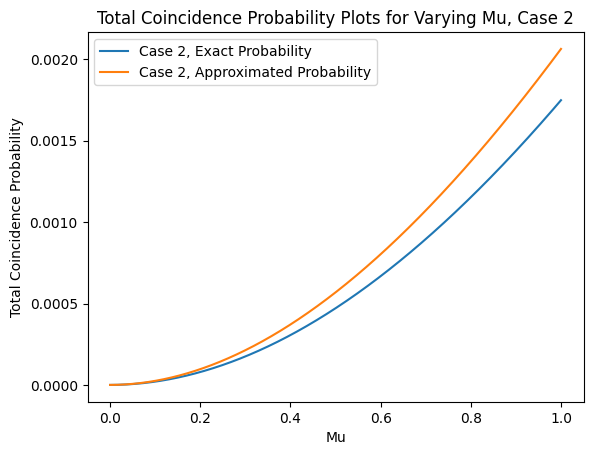

In [41]:
plt.plot(range_mu, total_coin_prob_2_mu, label = 'Case 2, Exact Probability')
plt.plot(range_mu, total_coin_prob_2_mu_approx, label = 'Case 2, Approximated Probability')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 2')
plt.legend()
plt.savefig("total_coin_prob_2_mu_comp_2.png")
plt.show()

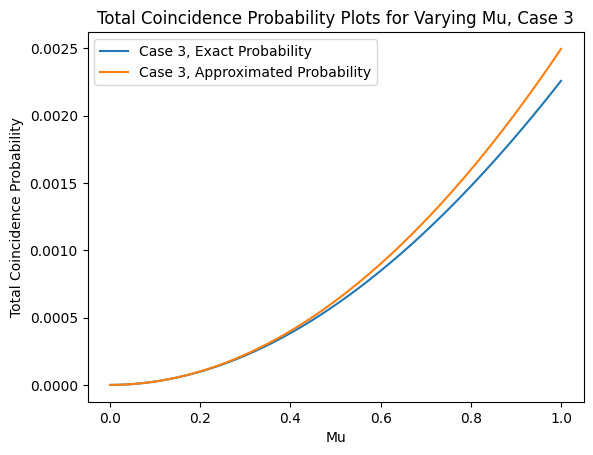

In [42]:
plt.plot(range_mu, total_coin_prob_3_mu, label = 'Case 3, Exact Probability')
plt.plot(range_mu, total_coin_prob_3_mu_approx, label = 'Case 3, Approximated Probability')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 3')
plt.legend()
plt.savefig("total_coin_prob_3_mu_comp_2.png")
plt.show()

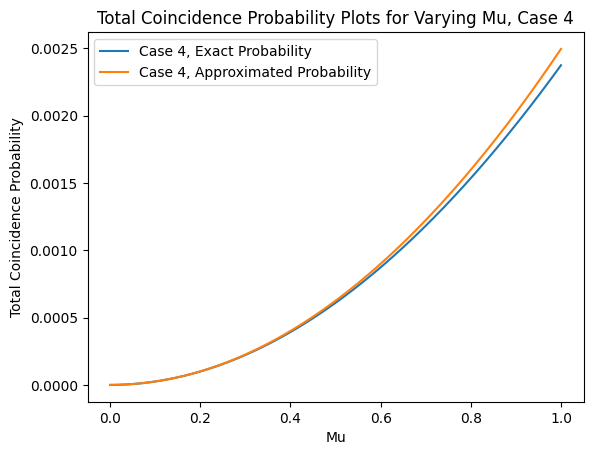

In [43]:
plt.plot(range_mu, total_coin_prob_4_mu, label = 'Case 4, Exact Probability')
plt.plot(range_mu, total_coin_prob_4_mu_approx, label = 'Case 4, Approximated Probability')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 4')
plt.legend()
plt.savefig("total_coin_prob_4_mu_comp_2.png")
plt.show()